In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
from collections import deque
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import differential_evolution
# from bayes_opt import BayesianOptimization
import numpy as np
from collections import defaultdict
from typing import Dict, List, Tuple

In [ ]:
df = pd.read_csv("/content/retail_price.csv")
df.head(2)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95


In [ ]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [ ]:
df['month_year'].values

array(['01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-01-2018', '01-02-2018', '01-03-2018', '01-04-2018',
       '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018',
       '01-03-2017', '01-04-2017', '01-05-2017', '01-06-2017',
       '01-07-2017', '01-08-2017', '01-09-2017', '01-10-2017',
       '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018',
       '01-03-2018', '01-04-2018', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-02-2018', '01-03-2018', '01-04-2018', '01-05-2018',
       '01-06-2018', '01-07-2018', '01-04-2017', '01-05-2017',
       '01-07-2017', '01-08-2017', '01-09-2017', '01-10-2017',
       '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018',
       '01-03-2018', '01-04-2018', '01-05-2018', '01-06-2018',
       '01-07-2018', '01-08-2018', '01-02-2017', '01-03-2017',
       '01-04-2017', '01-05-2017', '01-06-2017', '01-07

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


<Figure size 1200x600 with 0 Axes>

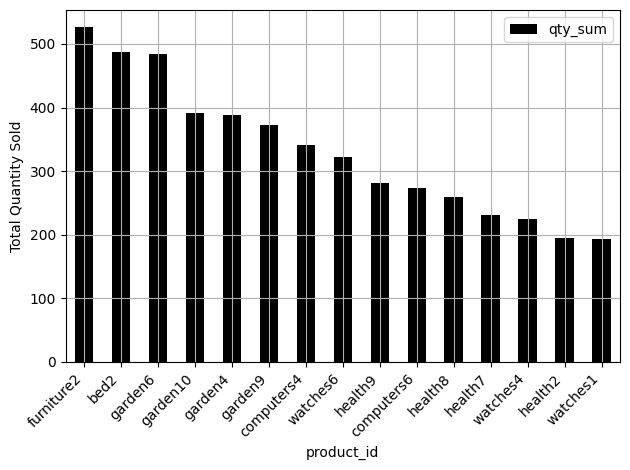

In [ ]:
# Group by product_id and calculate key metrics
product_stats = df.groupby('product_id').agg({
    'qty': ['sum', 'mean', 'std'],
    'unit_price': ['mean', 'std'],
    'total_price': 'sum',
    'month_year': ['min', 'max', 'nunique']  }).reset_index()

product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]
product_stats = product_stats.rename(columns={'product_id_': 'product_id'})

product_stats['total_revenue'] = product_stats['total_price_sum']
product_stats['avg_order_size'] = product_stats['qty_mean']
product_stats['price_variability'] = product_stats['unit_price_std'] / product_stats['unit_price_mean']
product_stats['sales_cv'] = product_stats['qty_std'] / product_stats['qty_mean']  # Coefficient of variation

top_products = product_stats.sort_values('qty_sum', ascending=False)
# print(top_products.head())

# Visualization (top 15 products by total quantity)
plt.figure(figsize=(12, 6))
top_products.head(15).plot(x='product_id', y='qty_sum', kind='bar', color='k')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 3600x2400 with 0 Axes>

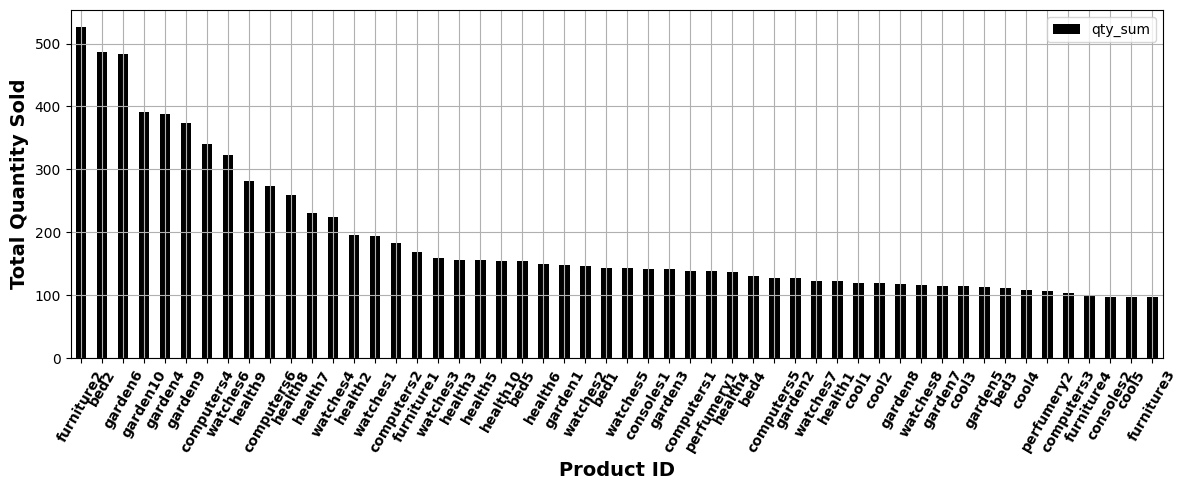

In [ ]:
product_stats = df.groupby('product_id').agg({
    'qty': ['sum', 'mean', 'std'],
    'unit_price': ['mean', 'std'],
    'total_price': 'sum',
    'month_year': ['min', 'max', 'nunique']  }).reset_index()

product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]
product_stats = product_stats.rename(columns={'product_id_': 'product_id'})

product_stats['total_revenue'] = product_stats['total_price_sum']
product_stats['avg_order_size'] = product_stats['qty_mean']
product_stats['price_variability'] = product_stats['unit_price_std'] / product_stats['unit_price_mean']
product_stats['sales_cv'] = product_stats['qty_std'] / product_stats['qty_mean']  # Coefficient of variation

all_products = product_stats.sort_values('qty_sum', ascending=False)

plt.figure(figsize=(12, 8), dpi=300)
ax = all_products.plot(x='product_id', y='qty_sum', kind='bar',
                      # title='All Products by Total Quantity Sold',
                      figsize=(12, 5), color='k')

plt.ylabel('Total Quantity Sold', fontsize=14, fontweight='bold')
plt.xlabel('Product ID', fontsize=14, fontweight='bold')
plt.grid()

ax.set_xticklabels(all_products['product_id'], rotation=60, ha='center', fontsize=10, fontweight='bold')

# for p in ax.patches:
#     ax.annotate(f"{int(p.get_height())}",
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 5),
#                 textcoords='offset points',
#                 fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

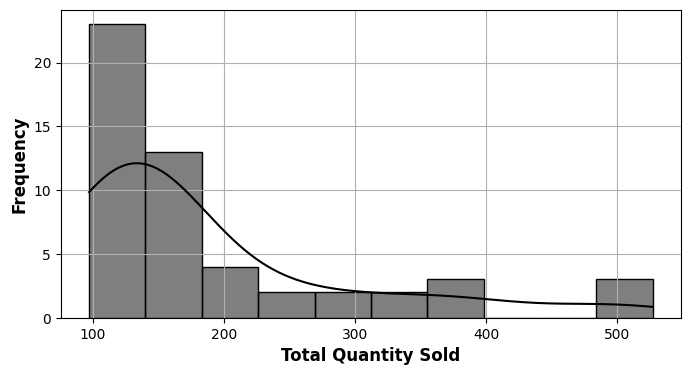

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(all_products['qty_sum'], kde=True, color='black')
# plt.title('Distribution of Total Quantity Sold Across Products', fontsize=14, fontweight='bold')
plt.xlabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

In [ ]:
df.tail(2)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.2875,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.1000,199.509804


In [ ]:
df.shape

(676, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [ ]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

In [ ]:
monthly_demand = (
    df.groupby(['product_id', 'month_year'])['qty']
    .sum()
    .reset_index()
    .rename(columns={'qty': 'Monthly_Demand'}))


In [ ]:
valid_products = monthly_demand.groupby('product_id').filter(lambda x: x['Monthly_Demand'].count() >= 3)


In [ ]:
cv_stats = (
    valid_products
    .groupby('product_id')['Monthly_Demand']
    .agg(['mean', 'std'])
    .reset_index())
cv_stats = cv_stats[cv_stats['mean'] > 0]
cv_stats['CV'] = cv_stats['std'] / cv_stats['mean']



In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

def safe_ljung_box(ts, max_lag=4):
    ts = ts.dropna()
    if len(ts) < 5 or ts.sum() == 0:
        return np.nan
    lags = min(max_lag, len(ts) - 1)
    try:
        result = acorr_ljungbox(ts, lags=[lags], return_df=True)
        return result['lb_pvalue'].iloc[0]
    except:
        return np.nan

ljung_results = (
    valid_products
    .groupby('product_id')['Monthly_Demand']
    .apply(lambda x: safe_ljung_box(x, max_lag=4))
    .reset_index(name='Ljung_pvalue'))
summary = pd.merge(cv_stats[['product_id', 'CV']], ljung_results, on='product_id')

summary['CV_Flag'] = np.where(summary['CV'] >= 0.5, 'High Variability', 'Low/Moderate Variability')
summary['Ljung_Flag'] = np.where(summary['Ljung_pvalue'] > 0.05, 'Random', 'Autocorrelated')

def classify_demand(row):
    if row['CV_Flag'] == 'High Variability' and row['Ljung_Flag'] == 'Random':
        return 'Highly Stochastic'
    elif row['CV_Flag'] == 'Low/Moderate Variability' and row['Ljung_Flag'] == 'Random':
        return 'Moderately Stochastic'
    elif row['Ljung_Flag'] == 'Autocorrelated':
        return 'Deterministic or Patterned'
    else:
        return 'Uncertain'

summary['Demand_Type'] = summary.apply(classify_demand, axis=1)
summary

,product_id,CV,Ljung_pvalue,CV_Flag,Ljung_Flag,Demand_Type
0,bed1,0.714063,0.036613,High Variability,Autocorrelated,Deterministic or Patterned
1,bed2,0.662889,0.105471,High Variability,Random,Highly Stochastic
2,bed3,0.570065,0.777323,High Variability,Random,Highly Stochastic
3,bed4,0.823304,0.211229,High Variability,Random,Highly Stochastic
4,bed5,0.822461,0.344863,High Variability,Random,Highly Stochastic
5,computers1,1.052972,0.695802,High Variability,Random,Highly Stochastic
6,computers2,1.130222,0.339279,High Variability,Random,Highly Stochastic
7,computers3,0.593302,0.537921,High Variability,Random,Highly Stochastic
8,computers4,0.845054,0.000463,High Variability,Autocorrelated,Deterministic or Patterned
9,computers5,1.391720,0.338313,High Variability,Random,Highly Stochastic


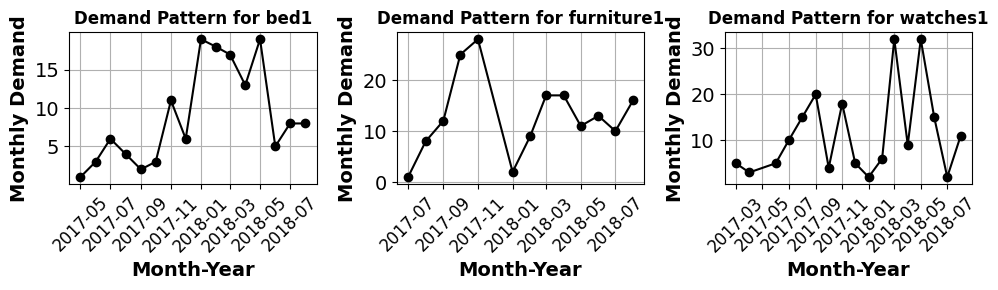

In [ ]:
sample_ids = ['bed1', 'furniture1', 'watches1']
fig, axes = plt.subplots(1, len(sample_ids), figsize=(10, 3)) # Adjust figsize as needed

for i, pid in enumerate(sample_ids):
    series = monthly_demand[monthly_demand['product_id'] == pid]
    axes[i].plot(series['month_year'], series['Monthly_Demand'], marker='o', color='k')
    axes[i].set_title(f"Demand Pattern for {pid}", fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].set_xlabel("Month-Year", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Monthly Demand", fontsize=14, fontweight='bold')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## **Estimated warehouse capacity**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization


# Convert date and extract temporal features
df['month_year'] = pd.to_datetime(df['month_year'])
df['week'] = df['month_year'].dt.isocalendar().week
df['year'] = df['month_year'].dt.isocalendar().year


product_reference_prices = df.groupby('product_id')['unit_price'].mean().to_dict()


def get_weekly_demand(product_id, df, min_weeks=8, min_demand=5):
    """Get weekly demand with guaranteed valid output"""
    try:
        weekly = (df[df['product_id'] == product_id]
                  .groupby(['year', 'week'])['qty']
                  .sum()
                  .reset_index()
                  .sort_values(['year', 'week']))

        if len(weekly) < min_weeks:
            # print(f"Generating synthetic demand for {product_id} (insufficient data)")
            demand_series = [max(min_demand, int(np.random.poisson(15))) for _ in range(min_weeks)]
        else:
            demand_series = weekly['qty'].values.tolist()
            demand_series = [max(min_demand, d) for d in demand_series]

        ref_price = df[df['product_id'] == product_id]['unit_price'].mean()
        if pd.isna(ref_price):
             ref_price = product_reference_prices.get(product_id, 10.0)


        return demand_series, ref_price

    except Exception as e:
        print(f"Error processing demand data for {product_id}: {str(e)}")
        return None, None


class RetailEnv:
    def __init__(self, demand_series, ref_price, init_inventory=100, lead_time=2,
                 elasticity=-0.8, holding_rate=0.1, stockout_penalty=1.0,
                 order_cost=0.5, z_score=1.28):

        # Guarantee valid demand series
        if not isinstance(demand_series, list) or len(demand_series) < 4:
            self.original_demand = [max(5, int(np.random.poisson(15))) for _ in range(8)]
        else:
            self.original_demand = [max(1, int(d)) for d in demand_series]

        self.ref_price = max(0.1, float(ref_price))
        self.weeks = len(self.original_demand)
        self.init_inventory = max(0, int(init_inventory))
        self.lead_time = min(max(1, int(lead_time)), self.weeks-1)

        # Set parameters with validation
        self.elasticity = max(-5.0, min(0.0, float(elasticity)))  # Negative elasticity
        self.holding_rate = max(0.0, float(holding_rate))
        self.stockout_penalty = max(0.0, float(stockout_penalty))
        self.order_cost = max(0.0, float(order_cost))
        self.z_score = max(0.0, float(z_score))

        # Calculate demand variability
        if self.weeks > self.lead_time:
            lead_time_demands = [sum(self.original_demand[i:i+self.lead_time])
                               for i in range(len(self.original_demand)-self.lead_time)]
            self.std_demand_lead_time = np.std(lead_time_demands) if len(lead_time_demands) > 1 else 5.0
        else:
            self.std_demand_lead_time = np.std(self.original_demand) if len(self.original_demand) > 1 else 5.0

        self.reset()

    def reset(self):
        self.current_week = 0
        self.inventory = self.init_inventory
        self.pending_orders = []
        self.stockouts = 0
        self.total_profit = 0
        self.total_demand = 0
        self.total_sales = 0
        return self

    def step(self, price):
        if self.current_week >= self.weeks:
            return 0

        # Get current demand with price elasticity
        base_demand = self.original_demand[self.current_week]
        demand = max(1, base_demand * (max(0.1, price) / self.ref_price) ** self.elasticity)

        # Inventory replenishment logic
        forecasted_demand = demand * self.lead_time
        safety_stock = self.z_score * self.std_demand_lead_time
        target_inventory_level = forecasted_demand + safety_stock
        order_qty = max(0, round(target_inventory_level - self.inventory))

        # Business calculations
        sales_qty = min(self.inventory, demand)
        revenue = sales_qty * price
        holding_cost = self.inventory * self.holding_rate
        stockout_cost = max(demand - sales_qty, 0) * self.stockout_penalty
        order_cost = order_qty * self.order_cost

        # Update state
        profit = revenue - holding_cost - stockout_cost - order_cost
        self.total_profit += profit
        self.inventory -= sales_qty

        if order_qty > 0:
            self.pending_orders.append((self.current_week + self.lead_time, order_qty))

        # Receive pending orders
        arrived = sum(q for t, q in self.pending_orders if t == self.current_week)
        self.inventory += arrived
        self.pending_orders = [(t, q) for t, q in self.pending_orders if t > self.current_week]

        # Update metrics
        self.stockouts += max(0, demand - sales_qty)
        self.total_sales += sales_qty
        self.total_demand += demand
        self.current_week += 1

        return profit

    def service_level(self):
        return self.total_sales / self.total_demand if self.total_demand > 0 else 0


def estimate_warehouse_capacity(demand_series, ref_price, num_simulations=1000):
    """
    Estimates warehouse capacity needed by simulating inventory levels.

    Args:
        demand_series (list): List of demand values over time.
        ref_price (float): Reference price for the product.
        num_simulations (int): Number of simulation runs.

    Returns:
        float: Estimated maximum inventory level across all simulations.
    """
    max_inventory = 0
    for _ in range(num_simulations):
        env = RetailEnv(demand_series, ref_price)
        current_max_inventory = 0
        for week in range(env.weeks):
            # Use a simple price for simulation, e.g., the reference price
            env.step(ref_price)
            current_max_inventory = max(current_max_inventory, env.inventory)
        max_inventory = max(max_inventory, current_max_inventory)
    return max_inventory

# Get all unique product IDs with at least 3 months of data
monthly_demand = (
    df.groupby(['product_id', 'month_year'])['qty']
    .sum()
    .reset_index()
    .rename(columns={'qty': 'Monthly_Demand'}))

valid_product_ids = monthly_demand.groupby('product_id').filter(lambda x: x['Monthly_Demand'].count() >= 3)['product_id'].unique()


total_estimated_capacity = 0
product_capacity_estimates = {}

for product_id in valid_product_ids:
    # Get demand series and reference price for the selected product
    demand_series_capacity, ref_price_capacity = get_weekly_demand(product_id, df)

    # Estimate capacity for the product if data is valid
    if demand_series_capacity is not None and ref_price_capacity is not None:
        estimated_capacity = estimate_warehouse_capacity(demand_series_capacity, ref_price_capacity)
        product_capacity_estimates[product_id] = estimated_capacity
        total_estimated_capacity += estimated_capacity
    else:
        print(f"Skipping product {product_id} due to invalid data.")


print("Estimated warehouse capacity for each product:")
for product_id, capacity in product_capacity_estimates.items():
    print(f"- {product_id}: {capacity:.2f} units")

print(f"\nTotal estimated warehouse capacity needed for all products: {total_estimated_capacity:.2f} units")

Estimated warehouse capacity for each product:
- bed1: 83.00 units
- bed2: 81.00 units
- bed3: 81.00 units
- bed4: 84.00 units
- bed5: 87.00 units
- computers1: 92.00 units
- computers2: 89.00 units
- computers3: 78.00 units
- computers4: 85.00 units
- computers5: 89.00 units
- computers6: 81.00 units
- consoles1: 87.00 units
- consoles2: 90.00 units
- cool1: 89.00 units
- cool2: 86.00 units
- cool3: 82.00 units
- cool4: 82.00 units
- cool5: 84.00 units
- furniture1: 95.00 units
- furniture2: 88.00 units
- furniture3: 87.00 units
- furniture4: 83.00 units
- garden1: 85.00 units
- garden10: 89.00 units
- garden2: 87.00 units
- garden3: 87.00 units
- garden4: 87.00 units
- garden5: 86.00 units
- garden6: 89.00 units
- garden7: 90.00 units
- garden8: 85.00 units
- garden9: 87.00 units
- health1: 80.00 units
- health10: 84.00 units
- health2: 83.00 units
- health3: 83.00 units
- health4: 88.00 units
- health5: 81.00 units
- health6: 89.00 units
- health7: 87.00 units
- health8: 82.00 units

In [ ]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['week'] = df['month_year'].dt.isocalendar().week
df['year'] = df['month_year'].dt.isocalendar().year


product_reference_prices = df.groupby('product_id')['unit_price'].mean().to_dict()


def get_weekly_demand(product_id, min_weeks=8, min_demand=5):
    """Get weekly demand with guaranteed valid output"""
    try:
        weekly = (df[df['product_id'] == product_id]
                  .groupby(['year', 'week'])['qty']
                  .sum()
                  .reset_index()
                  .sort_values(['year', 'week']))

        if len(weekly) < min_weeks:
            print(f"Generating synthetic demand for {product_id} (insufficient data)")
            demand_series = [max(min_demand, int(np.random.poisson(15))) for _ in range(min_weeks)]
        else:
            demand_series = weekly['qty'].values.tolist()
            demand_series = [max(min_demand, d) for d in demand_series]

        ref_price = product_reference_prices.get(product_id, 10.0)
        return demand_series, ref_price

    except Exception as e:
        print(f"Error processing demand data: {str(e)}")
        return [max(min_demand, int(np.random.poisson(15))) for _ in range(min_weeks)], 10.0


Analyzing product: furniture1
Reference price: 26.08
Demand series length: 12 weeks
Sample demand values: [23, 17, 26, 32, 18]...

Running optimizations...
|   iter    |  target   |   price   |
-------------------------------------
| 1         | 4811.9603 | 24.771202 |
| 2         | 5332.1585 | 30.781851 |
| 3         | 5050.2782 | 28.500160 |
| 4         | 4931.2006 | 27.109205 |
| 5         | 4687.8416 | 22.491586 |
| 6         | 5392.0583 | 31.295999 |
| 7         | 5392.0583 | 31.295999 |
| 8         | 5392.0583 | 31.295999 |
| 9         | 5392.0583 | 31.295999 |
| 10        | 5392.0583 | 31.295999 |
| 11        | 5392.0583 | 31.295999 |
| 12        | 5392.0583 | 31.295999 |
| 13        | 5392.0583 | 31.295999 |
| 14        | 5392.0583 | 31.295999 |
| 15        | 5392.0583 | 31.295999 |
| 16        | 5392.0583 | 31.295999 |
| 17        | 5392.0583 | 31.295999 |
| 18        | 5392.0583 | 31.295999 |
| 19        | 5392.0583 | 31.295999 |
| 20        | 5392.0583 | 31.295999 |

Episod

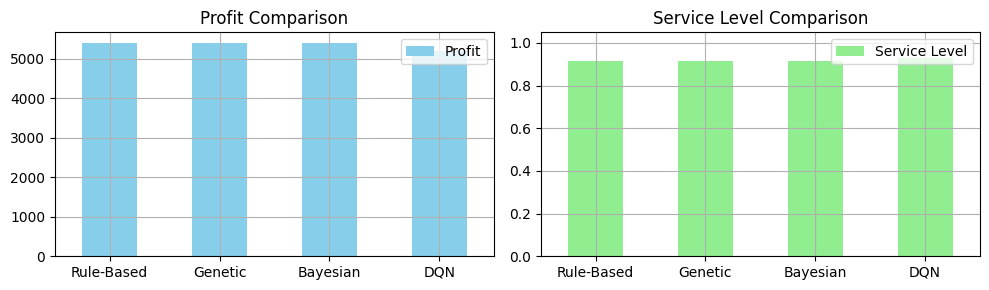

In [ ]:
class RetailEnv:
    def __init__(self, demand_series, ref_price, init_inventory=100, lead_time=2,
                 elasticity=-0.8, holding_rate=0.1, stockout_penalty=1.0,
                 order_cost=0.5, z_score=1.28):

        # Guarantee valid demand series
        if not isinstance(demand_series, list) or len(demand_series) < 4:
            self.original_demand = [max(5, int(np.random.poisson(15))) for _ in range(8)]
        else:
            self.original_demand = [max(1, int(d)) for d in demand_series]

        self.ref_price = max(0.1, float(ref_price))
        self.weeks = len(self.original_demand)
        self.init_inventory = max(0, int(init_inventory))
        self.lead_time = min(max(1, int(lead_time)), self.weeks-1)

        # Set parameters with validation
        self.elasticity = max(-5.0, min(0.0, float(elasticity)))  # Negative elasticity
        self.holding_rate = max(0.0, float(holding_rate))
        self.stockout_penalty = max(0.0, float(stockout_penalty))
        self.order_cost = max(0.0, float(order_cost))
        self.z_score = max(0.0, float(z_score))

        # Calculate demand variability
        if self.weeks > self.lead_time:
            lead_time_demands = [sum(self.original_demand[i:i+self.lead_time])
                               for i in range(len(self.original_demand)-self.lead_time)]
            self.std_demand_lead_time = np.std(lead_time_demands) if len(lead_time_demands) > 1 else 5.0
        else:
            self.std_demand_lead_time = np.std(self.original_demand) if len(self.original_demand) > 1 else 5.0

        self.reset()

    def reset(self):
        self.current_week = 0
        self.inventory = self.init_inventory
        self.pending_orders = []
        self.stockouts = 0
        self.total_profit = 0
        self.total_demand = 0
        self.total_sales = 0
        return self

    def step(self, price):
        if self.current_week >= self.weeks:
            return 0

        # Get current demand with price elasticity
        base_demand = self.original_demand[self.current_week]
        demand = max(1, base_demand * (max(0.1, price) / self.ref_price) ** self.elasticity)

        # Inventory replenishment logic
        forecasted_demand = demand * self.lead_time
        safety_stock = self.z_score * self.std_demand_lead_time
        target_inventory_level = forecasted_demand + safety_stock
        order_qty = max(0, round(target_inventory_level - self.inventory))

        # Business calculations
        sales_qty = min(self.inventory, demand)
        revenue = sales_qty * price
        holding_cost = self.inventory * self.holding_rate
        stockout_cost = max(demand - sales_qty, 0) * self.stockout_penalty
        order_cost = order_qty * self.order_cost

        # Update state
        profit = revenue - holding_cost - stockout_cost - order_cost
        self.total_profit += profit
        self.inventory -= sales_qty

        if order_qty > 0:
            self.pending_orders.append((self.current_week + self.lead_time, order_qty))

        # Receive pending orders
        arrived = sum(q for t, q in self.pending_orders if t == self.current_week)
        self.inventory += arrived
        self.pending_orders = [(t, q) for t, q in self.pending_orders if t > self.current_week]

        # Update metrics
        self.stockouts += max(0, demand - sales_qty)
        self.total_sales += sales_qty
        self.total_demand += demand
        self.current_week += 1

        return profit

    def service_level(self):
        return self.total_sales / self.total_demand if self.total_demand > 0 else 0

# ==========================
# OPTIMIZATION STRATEGIES
# ==========================

def monte_carlo_simulation(price, demand_series, ref_price, runs=10000):
    profits = []
    services = []
    for _ in range(runs):
        env = RetailEnv(demand_series, ref_price)
        for week in range(env.weeks):
            env.step(price)
        profits.append(env.total_profit)
        services.append(env.service_level())
    return np.mean(profits), np.mean(services)

def optimize_inventory(demand_series, ref_price):
    price_options = np.linspace(max(0.1, ref_price * 0.8), ref_price * 1.2, 10)
    results = []
    for price in price_options:
        avg_profit, avg_service = monte_carlo_simulation(price, demand_series, ref_price)
        results.append((price, avg_profit, avg_service))
    return pd.DataFrame(results, columns=["Price", "AvgProfit", "ServiceLevel"])

def genetic_optimization(demand_series, ref_price):
    bounds = [(max(0.1, ref_price * 0.8), ref_price * 1.2)]
    def objective(x):
        price = x[0]
        profit, _ = monte_carlo_simulation(price, demand_series, ref_price)
        return -profit
    result = differential_evolution(objective, bounds)
    best_price = result.x[0]
    profit, service = monte_carlo_simulation(best_price, demand_series, ref_price)
    return (best_price,), profit, service

def bayesian_optimization(demand_series, ref_price):
    def objective(price):
        profit, _ = monte_carlo_simulation(price, demand_series, ref_price)
        return profit
    pbounds = {'price': (max(0.1, ref_price * 0.8), ref_price * 1.2)}
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
    optimizer.maximize(init_points=5, n_iter=15)
    best_price = optimizer.max['params']['price']
    final_profit, service = monte_carlo_simulation(best_price, demand_series, ref_price)
    return {"params": optimizer.max['params'], "target": final_profit, "service_level": service}

class DQNAgent:
    def __init__(self, state_size=2, action_size=10, hidden_size=32, lr=0.001):
        self.model = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size))
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.995
        self.action_size = action_size

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)
        state = torch.FloatTensor(state)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def remember(self, state, action, reward, next_state):
        self.memory.append((state, action, reward, next_state))

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)

        states = torch.FloatTensor([t[0] for t in batch])
        actions = torch.LongTensor([t[1] for t in batch])
        rewards = torch.FloatTensor([t[2] for t in batch])
        next_states = torch.FloatTensor([t[3] for t in batch if t[3] is not None])

        current_q = self.model(states).gather(1, actions.unsqueeze(1))

        non_final_mask = torch.tensor([t[3] is not None for t in batch], dtype=torch.bool)
        next_q = torch.zeros(batch_size)
        next_q[non_final_mask] = self.model(next_states).max(1)[0].detach()

        target_q = rewards + self.gamma * next_q

        loss = nn.MSELoss()(current_q.squeeze(), target_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

def dqn_optimization(demand_series, ref_price, episodes=30, log_frequency=5):
    """Run DQN optimization with detailed logging"""
    # Guarantee valid demand series
    if not isinstance(demand_series, list) or len(demand_series) < 4:
        demand_series = [max(5, int(np.random.poisson(15))) for _ in range(8)]

    price_bins = np.linspace(max(0.1, ref_price * 0.8), ref_price * 1.2, 10)
    agent = DQNAgent()

    best_profit = -np.inf
    best_service = 0
    best_episode_log = None

    for ep in range(episodes):
        env = RetailEnv(demand_series, ref_price)
        state = [env.inventory, demand_series[0]]
        total_profit = 0
        episode_log = []

        for week in range(env.weeks):
            action = agent.select_action(state)
            price = price_bins[action]
            profit = env.step(price)
            total_profit += profit

            # Log current decision
            log_entry = {
                'episode': ep + 1,
                'week': week + 1,
                'price': round(price, 2),
                'inventory': env.inventory,
                'demand': demand_series[week],
                'profit': round(profit, 2),
                'action': action}
            episode_log.append(log_entry)

            next_week = week + 1 if week + 1 < env.weeks else None
            next_demand = demand_series[next_week] if next_week is not None else None
            next_state = [env.inventory, next_demand] if next_demand is not None else None

            agent.remember(state, action, profit, next_state)
            if next_week is not None:
                state = [env.inventory, demand_series[next_week]]

        agent.replay()

        if (ep + 1) % log_frequency == 0 or (ep + 1) == episodes:
            print(f"\nEpisode {ep + 1}/{episodes} Summary:")
            print(f"Total Profit: ${total_profit:.2f} | Service Level: {env.service_level():.2%}")
            print("Last 5 Decisions:")
            for decision in episode_log[-5:]:
                print(f"Week {decision['week']}: Price=${decision['price']} | "
                      f"Inventory={decision['inventory']} | Demand={decision['demand']} | "
                      f"Profit=${decision['profit']}")

        if total_profit > best_profit:
            best_profit = total_profit
            best_service = env.service_level()
            best_episode_log = episode_log

    # Print best episode details
    if best_episode_log:
        print("\n=== BEST EPISODE DETAILS ===")
        print(f"Profit: ${best_profit:.2f} | Service Level: {best_service:.2%}")
        print("Key Decisions:")
        for i in range(0, len(best_episode_log), max(1, len(best_episode_log)//5)):
            decision = best_episode_log[i]
            print(f"Week {decision['week']}: Price=${decision['price']} | "
                  f"Inventory={decision['inventory']} | Demand={decision['demand']}")

    return best_profit, best_service

if __name__ == '__main__':
    product_id = "furniture1"

    demand_series, ref_price = get_weekly_demand(product_id)

    print(f"\nAnalyzing product: {product_id}")
    print(f"Reference price: {ref_price:.2f}")
    print(f"Demand series length: {len(demand_series)} weeks")
    print(f"Sample demand values: {demand_series[:5]}...")

    try:
        print("\nRunning optimizations...")
        rule_df = optimize_inventory(demand_series, ref_price)
        ga_result = genetic_optimization(demand_series, ref_price)
        bayes_result = bayesian_optimization(demand_series, ref_price)
        dqn_result = dqn_optimization(demand_series, ref_price, episodes=30)

        def summarize_results():
            best_rule = rule_df.loc[rule_df["AvgProfit"].idxmax()]
            return pd.DataFrame([
                {"Strategy": "Rule-Based", "Best Price": best_rule["Price"],
                 "Profit": best_rule["AvgProfit"], "Service Level": best_rule["ServiceLevel"]},
                {"Strategy": "Genetic", "Best Price": round(ga_result[0][0], 2),
                 "Profit": ga_result[1], "Service Level": ga_result[2]},
                {"Strategy": "Bayesian", "Best Price": round(bayes_result["params"]["price"], 2),
                 "Profit": bayes_result["target"], "Service Level": bayes_result["service_level"]},
                {"Strategy": "DQN", "Best Price": "Dynamic",
                 "Profit": dqn_result[0], "Service Level": dqn_result[1]}])

        results = summarize_results()
        print("\nOptimization Results:")
        print(results)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
        results.plot(x="Strategy", y="Profit", kind="bar", ax=ax1, color='skyblue', title="Profit Comparison")
        ax1.grid()
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, horizontalalignment='center')
        ax1.set_xlabel('')

        results.plot(x="Strategy", y="Service Level", kind="bar", ax=ax2, color='lightgreen', title="Service Level Comparison")
        ax2.grid()
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, horizontalalignment='center')
        ax2.set_xlabel('')
        ax2.set_ylim(0, 1.05)

        plt.tight_layout()
        plt.show()

        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        # results.plot(x="Strategy", y="Profit", kind="bar", ax=ax1, color='skyblue', title="Profit Comparison")
        # results.plot(x="Strategy", y="Service Level", kind="bar", ax=ax2, color='lightgreen', title="Service Level Comparison")
        # plt.tight_layout()
        # plt.show()

    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        print("Running fallback single simulation...")
        env = RetailEnv(demand_series, ref_price)
        for week in range(env.weeks):
            profit = env.step(ref_price)
            print(f"Week {week+1}: Profit = {profit:.2f}")
        print(f"\nTotal Profit: {env.total_profit:.2f}")
        print(f"Service Level: {env.service_level():.2%}")

In [ ]:
!pip install bayesian-optimization


Analyzing product: furniture1
Reference price: 26.08
Demand series: [23, 17, 26, 32, 18, 19, 19, 17, 12, 13, 11, 17]

1. Running single-agent optimizations...
|   iter    |  target   |   price   |
-------------------------------------
| 1         | 4811.9603 | 24.771202 |
| 2         | 5332.1585 | 30.781851 |
| 3         | 5050.2782 | 28.500160 |
| 4         | 4931.2006 | 27.109205 |
| 5         | 4687.8416 | 22.491586 |
| 6         | 5392.0583 | 31.295999 |
| 7         | 5392.0583 | 31.295999 |
| 8         | 5392.0583 | 31.295999 |
| 9         | 5392.0583 | 31.295999 |
| 10        | 5392.0583 | 31.295999 |
| 11        | 5392.0583 | 31.295999 |
| 12        | 5392.0583 | 31.295999 |
| 13        | 5392.0583 | 31.295999 |
| 14        | 5392.0583 | 31.295999 |
| 15        | 5392.0583 | 31.295999 |
| 16        | 5392.0583 | 31.295999 |
| 17        | 5392.0583 | 31.295999 |
| 18        | 5392.0583 | 31.295999 |
| 19        | 5392.0583 | 31.295999 |
| 20        | 5392.0583 | 31.295999 |

2. 

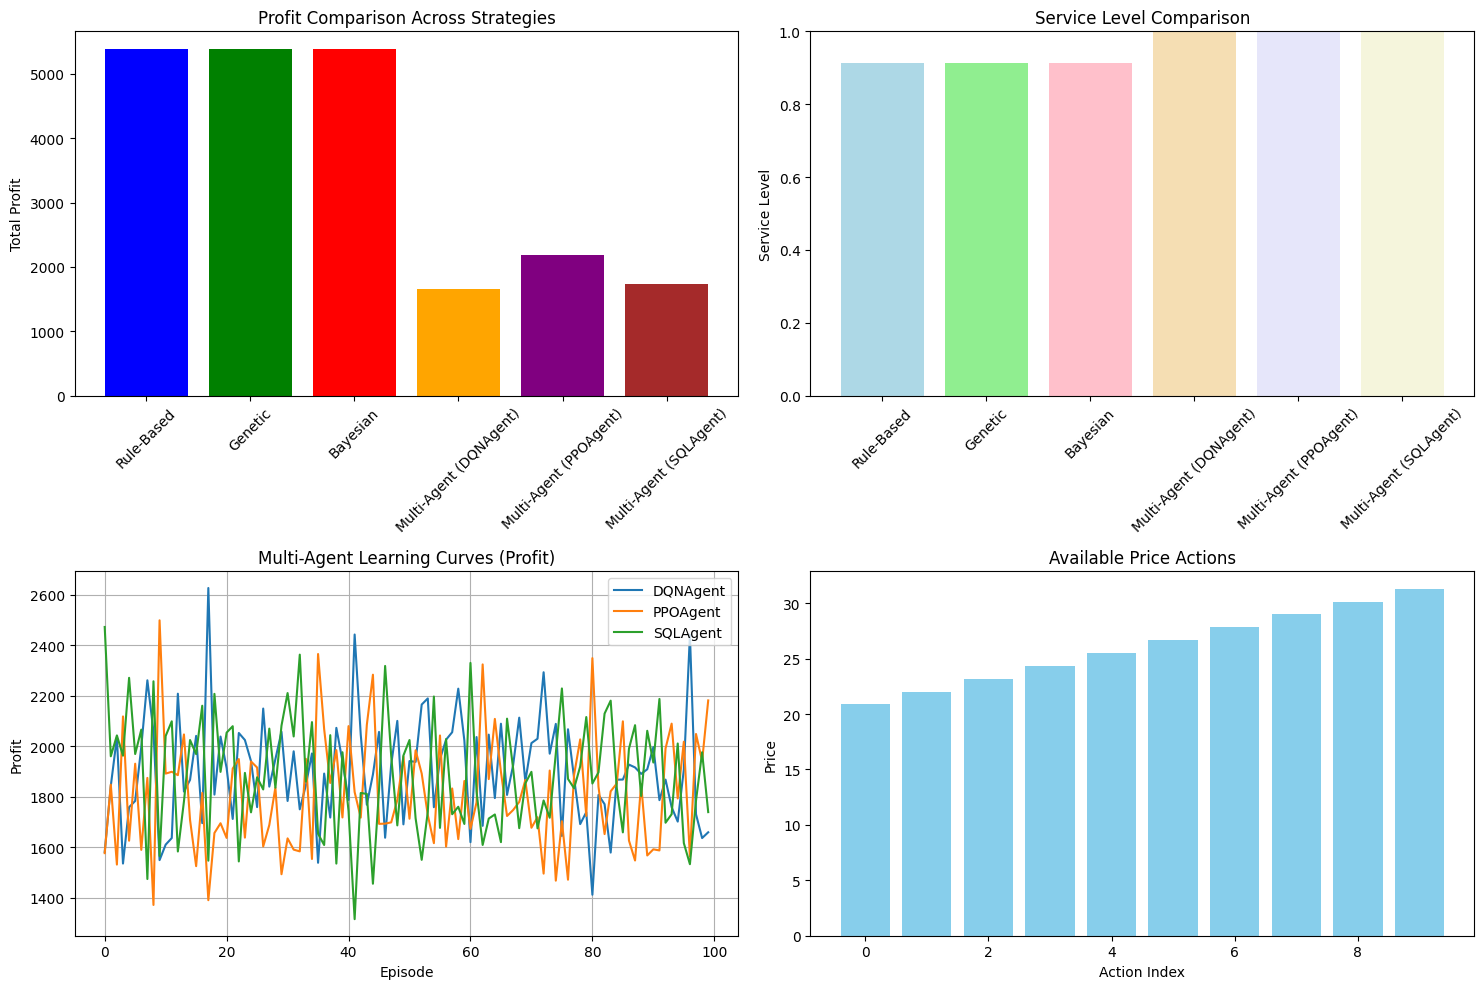


5. Agent Strategy Analysis:

Agent 0 (DQNAgent):
  Final Profit: 1659.62
  Service Level: 1.000
  Average Price: 26.47
  Prices Set: ['23.2', '31.3', '29.0', '22.0']...

Agent 1 (PPOAgent):
  Final Profit: 2181.79
  Service Level: 1.000
  Average Price: 25.60
  Prices Set: ['25.5', '25.5', '25.5', '24.3']...

Agent 2 (SQLAgent):
  Final Profit: 1739.49
  Service Level: 1.000
  Average Price: 23.09
  Prices Set: ['22.0', '22.0', '22.0', '22.0']...


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical, Normal
import random
from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Simulated database function
def get_weekly_demand(product_id):
    """Simulate fetching demand data from database"""
    np.random.seed(42)
    base_demand = np.random.poisson(20, 12)
    seasonal_factor = 1 + 0.3 * np.sin(np.arange(12) * np.pi / 6)
    demand_series = (base_demand * seasonal_factor).astype(int)
    ref_price = 25.0 + np.random.uniform(-5, 5)
    return demand_series.tolist(), round(ref_price, 2)

class MultiAgentRetailEnv:
    def __init__(self, demand_series, ref_price, n_agents=3, init_inventory=100,
                 lead_time=2, elasticity=-0.8, holding_rate=0.1,
                 stockout_penalty=1.0, order_cost=0.5, z_score=1.28):

        self.n_agents = n_agents
        self.original_demand = [max(1, int(d)) for d in demand_series]
        self.ref_price = max(0.1, float(ref_price))
        self.weeks = len(self.original_demand)

        # Initialize agents with different parameters
        self.agents = []
        for i in range(n_agents):
            agent_info = {
                'init_inventory': max(0, int(init_inventory * (0.8 + 0.4 * i/n_agents))),
                'elasticity': max(-5.0, min(-0.1, float(elasticity) * (0.9 + 0.2 * i/n_agents))),
                'holding_rate': max(0.0, float(holding_rate) * (0.8 + 0.4 * i/n_agents)),
                'competitiveness': 0.1 * i  # How much agents care about competition
            }
            self.agents.append(agent_info)

        # Common parameters
        self.lead_time = min(max(1, int(lead_time)), self.weeks-1)
        self.stockout_penalty = max(0.0, float(stockout_penalty))
        self.order_cost = max(0.0, float(order_cost))
        self.z_score = max(0.0, float(z_score))

        # Calculate demand variability
        if self.weeks > self.lead_time:
            lead_time_demands = [sum(self.original_demand[i:i+self.lead_time])
                               for i in range(len(self.original_demand)-self.lead_time)]
            self.std_demand_lead_time = np.std(lead_time_demands) if len(lead_time_demands) > 1 else 5.0
        else:
            self.std_demand_lead_time = np.std(self.original_demand) if len(self.original_demand) > 1 else 5.0

        self.reset()

    def reset(self):
        self.current_week = 0
        self.agent_states = []

        for agent in self.agents:
            state = {
                'inventory': agent['init_inventory'],
                'pending_orders': [],
                'total_profit': 0,
                'total_sales': 0,
                'total_demand': 0,
                'stockouts': 0,
                'prices_set': []
            }
            self.agent_states.append(state)

        return self.get_global_state()

    def get_global_state(self):
        """Get state observable by all agents"""
        return {
            'week': self.current_week,
            'total_weeks': self.weeks,
            'avg_inventory': np.mean([s['inventory'] for s in self.agent_states]),
            'market_demand': self.original_demand[self.current_week] if self.current_week < self.weeks else 0
        }

    def get_agent_state(self, agent_id):
        """Get private state for specific agent"""
        global_state = self.get_global_state()
        private_state = self.agent_states[agent_id].copy()
        return {**global_state, **private_state}

    def step(self, actions):
        """Execute actions for all agents"""
        if self.current_week >= self.weeks:
            return [0] * self.n_agents, self.get_global_state(), True

        base_demand = self.original_demand[self.current_week]
        profits = []
        market_share_factor = 1.0 / self.n_agents  # Default equal share

        # Calculate market share based on price competitiveness
        prices = [actions[i] for i in range(self.n_agents)]
        avg_price = np.mean(prices)
        price_deviations = [abs(p - avg_price) for p in prices]

        if sum(price_deviations) > 0:
            competitiveness = [1 / (1 + dev) for dev in price_deviations]
            market_share_factor = [c / sum(competitiveness) for c in competitiveness]
        else:
            market_share_factor = [1/self.n_agents] * self.n_agents

        for i, (action, share) in enumerate(zip(actions, market_share_factor)):
            agent = self.agents[i]
            state = self.agent_states[i]

            # Calculate demand with elasticity and market share
            agent_demand = max(1, base_demand * share *
                             (max(0.1, action) / self.ref_price) ** agent['elasticity'])

            # Inventory management
            forecasted_demand = agent_demand * self.lead_time
            safety_stock = self.z_score * self.std_demand_lead_time
            target_inventory_level = forecasted_demand + safety_stock
            order_qty = max(0, round(target_inventory_level - state['inventory']))

            # Business calculations
            sales_qty = min(state['inventory'], agent_demand)
            revenue = sales_qty * action
            holding_cost = state['inventory'] * agent['holding_rate']
            stockout_cost = max(agent_demand - sales_qty, 0) * self.stockout_penalty
            order_cost = order_qty * self.order_cost

            profit = revenue - holding_cost - stockout_cost - order_cost
            state['total_profit'] += profit
            state['inventory'] -= sales_qty

            if order_qty > 0:
                state['pending_orders'].append((self.current_week + self.lead_time, order_qty))

            # Receive pending orders
            arrived = sum(q for t, q in state['pending_orders'] if t == self.current_week)
            state['inventory'] += arrived
            state['pending_orders'] = [(t, q) for t, q in state['pending_orders'] if t > self.current_week]

            # Update metrics
            state['stockouts'] += max(0, agent_demand - sales_qty)
            state['total_sales'] += sales_qty
            state['total_demand'] += agent_demand
            state['prices_set'].append(action)

            profits.append(profit)

        self.current_week += 1
        done = self.current_week >= self.weeks

        return profits, self.get_global_state(), done

    def get_agent_performance(self, agent_id):
        state = self.agent_states[agent_id]
        service_level = state['total_sales'] / state['total_demand'] if state['total_demand'] > 0 else 0
        return {
            'total_profit': state['total_profit'],
            'service_level': service_level,
            'avg_price': np.mean(state['prices_set']) if state['prices_set'] else 0
        }

# ==========================
# MULTI-AGENT RL ALGORITHMS
# ==========================

class DQNAgent:
    def __init__(self, state_size, action_size, hidden_size=64, lr=0.001, agent_id=0):
        self.agent_id = agent_id
        self.state_size = state_size
        self.action_size = action_size
        self.hidden_size = hidden_size

        self.model = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size)
        )

        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.995
        self.batch_size = 64

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)

        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > 10000:
            self.memory.pop(0)

    def replay(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        current_q = self.model(states).gather(1, actions.unsqueeze(1))
        next_q = self.model(next_states).max(1)[0].detach()
        target_q = rewards + (1 - dones) * self.gamma * next_q

        loss = F.mse_loss(current_q.squeeze(), target_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

class PPOAgent:
    def __init__(self, state_size, action_size, hidden_size=64, lr=0.0003, agent_id=0):
        self.agent_id = agent_id
        self.state_size = state_size
        self.action_size = action_size

        # Actor network (policy)
        self.actor = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size),
            nn.Softmax(dim=-1)
        )

        # Critic network (value function)
        self.critic = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

        self.optimizer = optim.Adam([
            {'params': self.actor.parameters()},
            {'params': self.critic.parameters()}
        ], lr=lr)

        self.memory = []
        self.gamma = 0.99
        self.eps_clip = 0.2
        self.K_epochs = 4
        self.batch_size = 64

    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        probs = self.actor(state)
        dist = Categorical(probs)
        action = dist.sample()

        return action.item()  # Return integer, not tensor

    def remember(self, state, action, log_prob, reward, next_state, done):
        self.memory.append((state, action, log_prob, reward, next_state, done))

    def update(self):
        if len(self.memory) < self.batch_size:
            return

        # Convert memory to tensors
        states, actions, old_log_probs, rewards, next_states, dones = zip(*self.memory)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        old_log_probs = torch.FloatTensor(old_log_probs)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        # Calculate advantages
        with torch.no_grad():
            values = self.critic(states).squeeze()
            next_values = self.critic(next_states).squeeze()
            advantages = rewards + (1 - dones) * self.gamma * next_values - values

        # PPO update
        for _ in range(self.K_epochs):
            # Calculate new log probabilities
            probs = self.actor(states)
            dist = Categorical(probs)
            new_log_probs = dist.log_prob(actions)

            # Ratio and surrogate loss
            ratios = torch.exp(new_log_probs - old_log_probs)
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1 - self.eps_clip, 1 + self.eps_clip) * advantages

            # Actor loss
            actor_loss = -torch.min(surr1, surr2).mean()

            # Critic loss
            values = self.critic(states).squeeze()
            critic_loss = F.mse_loss(values, rewards + (1 - dones) * self.gamma * next_values)

            # Total loss
            loss = actor_loss + 0.5 * critic_loss

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        self.memory = []

class SQLAgent:  # Soft Q-Learning
    def __init__(self, state_size, action_size, hidden_size=64, lr=0.001, agent_id=0, temp=1.0):
        self.agent_id = agent_id
        self.state_size = state_size
        self.action_size = action_size
        self.temp = temp  # Temperature parameter

        self.q_network = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size)
        )

        self.target_network = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size)
        )

        self.target_network.load_state_dict(self.q_network.state_dict())
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)

        self.memory = []
        self.gamma = 0.95
        self.tau = 0.005  # Target network update rate
        self.batch_size = 64

    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        q_values = self.q_network(state)

        # Softmax policy with temperature
        probs = F.softmax(q_values / self.temp, dim=-1).squeeze().detach().numpy()
        action = np.random.choice(self.action_size, p=probs)

        return action  # Return integer, not tensor

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > 10000:
            self.memory.pop(0)

    def update(self):
        if len(self.memory) < self.batch_size:
            return

        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        # Current Q values
        current_q = self.q_network(states).gather(1, actions.unsqueeze(1))

        # Next Q values from target network
        with torch.no_grad():
            next_q = self.target_network(next_states)
            # Soft Q-learning update
            next_v = self.temp * torch.log(torch.sum(torch.exp(next_q / self.temp), dim=1, keepdim=True))
            target_q = rewards.unsqueeze(1) + (1 - dones.unsqueeze(1)) * self.gamma * next_v

        # Compute loss
        loss = F.mse_loss(current_q, target_q)

        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Update target network
        for target_param, param in zip(self.target_network.parameters(), self.q_network.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

def run_multi_agent_simulation(env, agents, price_bins, episodes=100):
    """Run multi-agent simulation with different RL algorithms"""

    results = {f'agent_{i}': {'profits': [], 'service_levels': []} for i in range(env.n_agents)}

    for ep in range(episodes):
        state = env.reset()
        done = False
        episode_profits = [0] * env.n_agents

        while not done:
            actions = []
            for i, agent in enumerate(agents):
                agent_state = env.get_agent_state(i)
                # Flatten state for neural network input
                flat_state = [
                    agent_state['week'] / agent_state['total_weeks'],
                    agent_state['inventory'] / 100,  # normalized
                    agent_state['avg_inventory'] / 100,
                    agent_state['market_demand'] / 50  # normalized
                ]

                action_idx = agent.select_action(flat_state)
                actions.append(price_bins[action_idx])

            profits, next_state, done = env.step(actions)

            # Store experience and update agents
            for i, agent in enumerate(agents):
                agent_state = env.get_agent_state(i)
                flat_state = [
                    agent_state['week'] / agent_state['total_weeks'],
                    agent_state['inventory'] / 100,
                    agent_state['avg_inventory'] / 100,
                    agent_state['market_demand'] / 50
                ]

                next_flat_state = [
                    next_state['week'] / next_state['total_weeks'],
                    env.agent_states[i]['inventory'] / 100,
                    next_state['avg_inventory'] / 100,
                    next_state['market_demand'] / 50 if not done else 0
                ]

                # Agent-specific experience storage
                if isinstance(agent, DQNAgent):
                    agent.remember(flat_state, action_idx, profits[i], next_flat_state, done)
                elif isinstance(agent, PPOAgent):
                    # For PPO, we need to get log probability separately
                    state_tensor = torch.FloatTensor(flat_state).unsqueeze(0)
                    probs = agent.actor(state_tensor)
                    dist = Categorical(probs)
                    log_prob = dist.log_prob(torch.tensor([action_idx])).item()
                    agent.remember(flat_state, action_idx, log_prob, profits[i], next_flat_state, done)
                elif isinstance(agent, SQLAgent):
                    agent.remember(flat_state, action_idx, profits[i], next_flat_state, done)

                episode_profits[i] += profits[i]

        # Update agents
        for agent in agents:
            if isinstance(agent, DQNAgent):
                agent.replay()
            elif isinstance(agent, PPOAgent):
                agent.update()
            elif isinstance(agent, SQLAgent):
                agent.update()

        # Record results
        for i in range(env.n_agents):
            performance = env.get_agent_performance(i)
            results[f'agent_{i}']['profits'].append(episode_profits[i])
            results[f'agent_{i}']['service_levels'].append(performance['service_level'])

        if (ep + 1) % 20 == 0:
            print(f"Episode {ep + 1}/{episodes}")
            for i in range(env.n_agents):
                print(f"Agent {i} ({type(agents[i]).__name__}): "
                      f"Avg Profit: {np.mean(results[f'agent_{i}']['profits'][-20:]):.2f}")

    return results

# ==========================
# OPTIMIZATION STRATEGIES (Single Agent)
# ==========================

def monte_carlo_simulation(price, demand_series, ref_price, runs=1000):
    profits = []
    services = []
    for _ in range(runs):
        env = RetailEnv(demand_series, ref_price)
        for week in range(env.weeks):
            env.step(price)
        profits.append(env.total_profit)
        services.append(env.service_level())
    return np.mean(profits), np.mean(services)

def optimize_inventory(demand_series, ref_price):
    price_options = np.linspace(max(0.1, ref_price * 0.8), ref_price * 1.2, 10)
    results = []
    for price in price_options:
        avg_profit, avg_service = monte_carlo_simulation(price, demand_series, ref_price)
        results.append((price, avg_profit, avg_service))
    return pd.DataFrame(results, columns=["Price", "AvgProfit", "ServiceLevel"])

def genetic_optimization(demand_series, ref_price):
    bounds = [(max(0.1, ref_price * 0.8), ref_price * 1.2)]
    def objective(x):
        price = x[0]
        profit, _ = monte_carlo_simulation(price, demand_series, ref_price)
        return -profit
    result = differential_evolution(objective, bounds)
    best_price = result.x[0]
    profit, service = monte_carlo_simulation(best_price, demand_series, ref_price)
    return (best_price,), profit, service

def bayesian_optimization(demand_series, ref_price):
    def objective(price):
        profit, _ = monte_carlo_simulation(price, demand_series, ref_price)
        return profit
    pbounds = {'price': (max(0.1, ref_price * 0.8), ref_price * 1.2)}
    optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)
    optimizer.maximize(init_points=5, n_iter=15)
    best_price = optimizer.max['params']['price']
    final_profit, service = monte_carlo_simulation(best_price, demand_series, ref_price)
    return {"params": optimizer.max['params'], "target": final_profit, "service_level": service}

# Original RetailEnv class (for single-agent comparisons)
class RetailEnv:
    def __init__(self, demand_series, ref_price, init_inventory=100, lead_time=2,
                 elasticity=-0.8, holding_rate=0.1, stockout_penalty=1.0,
                 order_cost=0.5, z_score=1.28):
        self.original_demand = [max(1, int(d)) for d in demand_series]
        self.ref_price = max(0.1, float(ref_price))
        self.weeks = len(self.original_demand)
        self.init_inventory = max(0, int(init_inventory))
        self.lead_time = min(max(1, int(lead_time)), self.weeks-1)
        self.elasticity = max(-5.0, min(0.0, float(elasticity)))
        self.holding_rate = max(0.0, float(holding_rate))
        self.stockout_penalty = max(0.0, float(stockout_penalty))
        self.order_cost = max(0.0, float(order_cost))
        self.z_score = max(0.0, float(z_score))

        if self.weeks > self.lead_time:
            lead_time_demands = [sum(self.original_demand[i:i+self.lead_time])
                               for i in range(len(self.original_demand)-self.lead_time)]
            self.std_demand_lead_time = np.std(lead_time_demands) if len(lead_time_demands) > 1 else 5.0
        else:
            self.std_demand_lead_time = np.std(self.original_demand) if len(self.original_demand) > 1 else 5.0

        self.reset()

    def reset(self):
        self.current_week = 0
        self.inventory = self.init_inventory
        self.pending_orders = []
        self.stockouts = 0
        self.total_profit = 0
        self.total_demand = 0
        self.total_sales = 0
        return self

    def step(self, price):
        if self.current_week >= self.weeks:
            return 0

        base_demand = self.original_demand[self.current_week]
        demand = max(1, base_demand * (max(0.1, price) / self.ref_price) ** self.elasticity)

        forecasted_demand = demand * self.lead_time
        safety_stock = self.z_score * self.std_demand_lead_time
        target_inventory_level = forecasted_demand + safety_stock
        order_qty = max(0, round(target_inventory_level - self.inventory))

        sales_qty = min(self.inventory, demand)
        revenue = sales_qty * price
        holding_cost = self.inventory * self.holding_rate
        stockout_cost = max(demand - sales_qty, 0) * self.stockout_penalty
        order_cost = order_qty * self.order_cost

        profit = revenue - holding_cost - stockout_cost - order_cost
        self.total_profit += profit
        self.inventory -= sales_qty

        if order_qty > 0:
            self.pending_orders.append((self.current_week + self.lead_time, order_qty))

        arrived = sum(q for t, q in self.pending_orders if t == self.current_week)
        self.inventory += arrived
        self.pending_orders = [(t, q) for t, q in self.pending_orders if t > self.current_week]

        self.stockouts += max(0, demand - sales_qty)
        self.total_sales += sales_qty
        self.total_demand += demand
        self.current_week += 1

        return profit

    def service_level(self):
        return self.total_sales / self.total_demand if self.total_demand > 0 else 0

if __name__ == '__main__':
    product_id = "furniture1"
    demand_series, ref_price = get_weekly_demand(product_id)

    print(f"\nAnalyzing product: {product_id}")
    print(f"Reference price: {ref_price:.2f}")
    print(f"Demand series: {demand_series}")

    # Single-agent optimizations
    print("\n1. Running single-agent optimizations...")
    rule_df = optimize_inventory(demand_series, ref_price)
    ga_result = genetic_optimization(demand_series, ref_price)
    bayes_result = bayesian_optimization(demand_series, ref_price)

    # Multi-agent setup
    print("\n2. Setting up multi-agent environment...")
    n_agents = 3
    multi_env = MultiAgentRetailEnv(demand_series, ref_price, n_agents=n_agents)

    # Create different types of agents
    price_bins = np.linspace(max(0.1, ref_price * 0.8), ref_price * 1.2, 10)
    state_size = 4  # week, inventory, avg_inventory, market_demand (normalized)
    action_size = len(price_bins)

    agents = [
        DQNAgent(state_size, action_size, agent_id=0),
        PPOAgent(state_size, action_size, agent_id=1),
        SQLAgent(state_size, action_size, agent_id=2, temp=0.5)
    ]

    print("\n3. Running multi-agent simulation...")
    multi_agent_results = run_multi_agent_simulation(multi_env, agents, price_bins, episodes=100)

    # Calculate final performance
    final_performance = []
    for i in range(n_agents):
        perf = multi_env.get_agent_performance(i)
        agent_type = type(agents[i]).__name__
        final_performance.append({
            'Strategy': f'Multi-Agent ({agent_type})',
            'Best Price': f'Dynamic ({np.mean(multi_env.agent_states[i]["prices_set"]):.2f})',
            'Profit': perf['total_profit'],
            'Service Level': perf['service_level']
        })

    # Compare with single-agent results
    best_rule = rule_df.loc[rule_df["AvgProfit"].idxmax()]
    comparison_df = pd.DataFrame([
        {"Strategy": "Rule-Based", "Best Price": best_rule["Price"],
         "Profit": best_rule["AvgProfit"], "Service Level": best_rule["ServiceLevel"]},
        {"Strategy": "Genetic", "Best Price": round(ga_result[0][0], 2),
         "Profit": ga_result[1], "Service Level": ga_result[2]},
        {"Strategy": "Bayesian", "Best Price": round(bayes_result["params"]["price"], 2),
         "Profit": bayes_result["target"], "Service Level": bayes_result["service_level"]}
    ] + final_performance)

    print("\n4. Results Comparison:")
    print(comparison_df)

    # Plot results
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Profit comparison
    strategies = comparison_df['Strategy']
    profits = comparison_df['Profit']
    ax1.bar(strategies, profits, color=['blue', 'green', 'red', 'orange', 'purple', 'brown'])
    ax1.set_title('Profit Comparison Across Strategies')
    ax1.set_ylabel('Total Profit')
    ax1.tick_params(axis='x', rotation=45)

    # Service level comparison
    service_levels = comparison_df['Service Level']
    ax2.bar(strategies, service_levels, color=['lightblue', 'lightgreen', 'pink', 'wheat', 'lavender', 'beige'])
    ax2.set_title('Service Level Comparison')
    ax2.set_ylabel('Service Level')
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis='x', rotation=45)

    # Learning curves for multi-agent
    for i in range(n_agents):
        ax3.plot(multi_agent_results[f'agent_{i}']['profits'],
                label=f'{type(agents[i]).__name__}')
    ax3.set_title('Multi-Agent Learning Curves (Profit)')
    ax3.set_xlabel('Episode')
    ax3.set_ylabel('Profit')
    ax3.legend()
    ax3.grid(True)

    # Price bins
    ax4.bar(range(len(price_bins)), price_bins, color='skyblue')
    ax4.set_title('Available Price Actions')
    ax4.set_xlabel('Action Index')
    ax4.set_ylabel('Price')

    plt.tight_layout()
    plt.show()

    # Print agent strategies
    print("\n5. Agent Strategy Analysis:")
    for i, agent in enumerate(agents):
        perf = multi_env.get_agent_performance(i)
        print(f"\nAgent {i} ({type(agent).__name__}):")
        print(f"  Final Profit: {perf['total_profit']:.2f}")
        print(f"  Service Level: {perf['service_level']:.3f}")
        print(f"  Average Price: {perf['avg_price']:.2f}")
        print(f"  Prices Set: {[f'{p:.1f}' for p in multi_env.agent_states[i]['prices_set'][::3]]}...")

- Run for multiple products simultaneously?
- Adjust the multi-agent competition dynamics?
- Increase training episodes for better convergence?
- Add more analysis of the competitive behavior?

ANALYZING MULTIPLE PRODUCTS SIMULTANEOUSLY

furniture1 (furniture):
  Reference Price: $112.91
  Elasticity: -1.12
  Demand Pattern: [23, 17, 26, 32, 18, 19, 19, 17, 12, 13, 11, 17]

electronics2 (electronics):
  Reference Price: $207.71
  Elasticity: -0.99
  Demand Pattern: [13, 19, 12, 15, 16, 17, 9, 5, 10, 13, 8, 8]

clothing3 (clothing):
  Reference Price: $49.45
  Elasticity: -1.48
  Demand Pattern: [35, 37, 44, 36, 46, 31, 27, 28, 28, 15, 25, 29]

1. Running single-agent optimizations for each product...

Optimizing furniture1...

Optimizing electronics2...

Optimizing clothing3...

2. Running multi-product multi-agent simulation...

Episode 20/150

furniture1:
  DQNAgent: Avg Profit: 8564.76
  PPOAgent: Avg Profit: 8302.32
  SQLAgent: Avg Profit: 8284.38

electronics2:
  DQNAgent: Avg Profit: 10265.07
  PPOAgent: Avg Profit: 9321.92
  SQLAgent: Avg Profit: 10691.17

clothing3:
  DQNAgent: Avg Profit: 5442.46
  PPOAgent: Avg Profit: 6039.75
  SQLAgent: Avg Profit: 6225.15

Episod

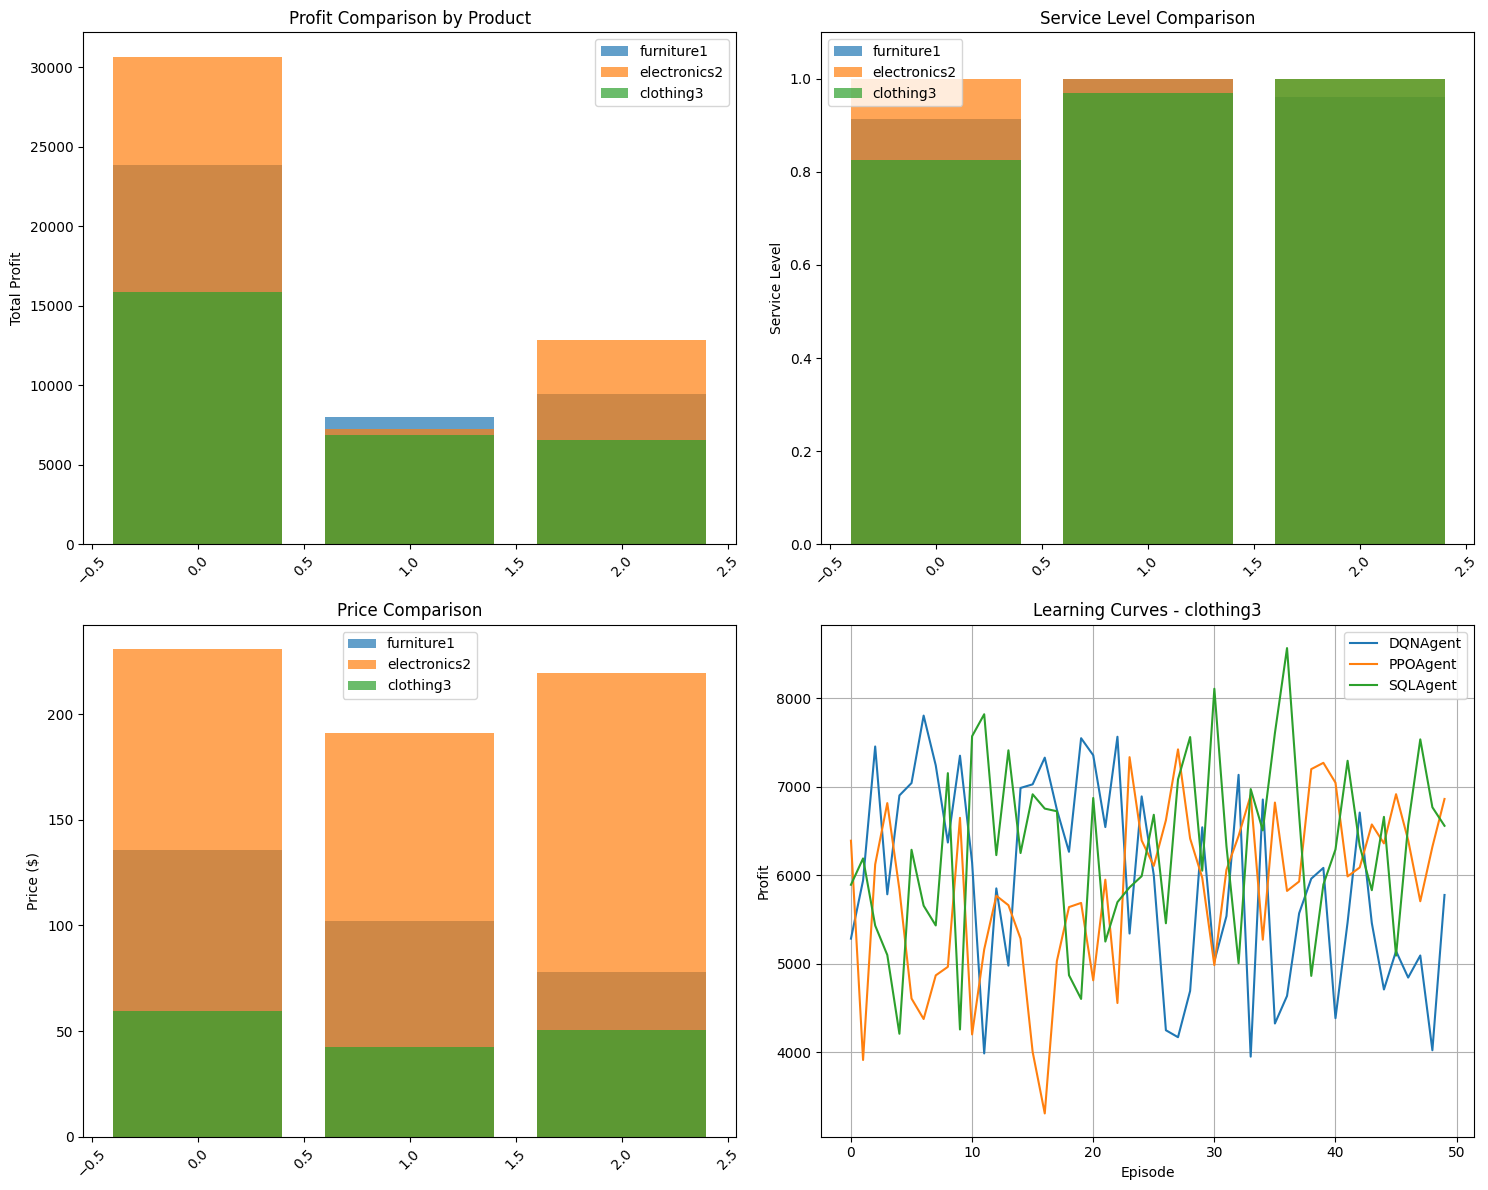


4. SUMMARY STATISTICS
                           Profit  Service_Level  Best_Price
Product      Agent_Type                                     
clothing3    PPOAgent     6863.52           0.97       42.62
             SQLAgent     6560.47           1.00       50.63
             Single      15855.04           0.83       59.34
electronics2 PPOAgent     7266.08           1.00      190.90
             SQLAgent    12844.56           1.00      219.58
             Single      30671.33           1.00      230.79
furniture1   PPOAgent     8009.52           1.00      102.16
             SQLAgent     9438.58           0.96       77.96
             Single      23826.52           0.91      135.49


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical, Normal
import random
from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Simulated database function for multiple products
def get_multiple_products(num_products=3):
    """Generate data for multiple products"""
    products = {}
    np.random.seed(42)

    product_categories = {
        'furniture': {'base_demand': 20, 'price_range': (50, 200), 'elasticity': -1.2},
        'electronics': {'base_demand': 15, 'price_range': (200, 1000), 'elasticity': -0.9},
        'clothing': {'base_demand': 30, 'price_range': (20, 100), 'elasticity': -1.5},
        'groceries': {'base_demand': 50, 'price_range': (5, 30), 'elasticity': -0.6}
    }

    categories = list(product_categories.keys())

    for i in range(num_products):
        category = categories[i % len(categories)]
        params = product_categories[category]

        base_demand = np.random.poisson(params['base_demand'], 12)
        seasonal_factor = 1 + 0.3 * np.sin(np.arange(12) * np.pi / 6)
        demand_series = (base_demand * seasonal_factor).astype(int)

        price_range = params['price_range']
        ref_price = np.random.uniform(price_range[0] * 0.8, price_range[1] * 0.8)

        product_id = f"{category}{i+1}"
        products[product_id] = {
            'demand_series': demand_series.tolist(),
            'ref_price': round(ref_price, 2),
            'category': category,
            'elasticity': params['elasticity'] * (0.9 + 0.2 * np.random.random())
        }

    return products

class MultiProductRetailEnv:
    def __init__(self, products, n_agents_per_product=2, init_inventory=100,
                 lead_time=2, holding_rate=0.1, stockout_penalty=1.0,
                 order_cost=0.5, z_score=1.28):

        self.products = products
        self.product_ids = list(products.keys())
        self.n_products = len(products)
        self.n_agents_per_product = n_agents_per_product
        self.total_agents = n_agents_per_product * self.n_products

        # Initialize product environments
        self.product_envs = {}
        for product_id, product_data in products.items():
            self.product_envs[product_id] = MultiAgentRetailEnv(
                product_data['demand_series'],
                product_data['ref_price'],
                n_agents=n_agents_per_product,
                init_inventory=init_inventory,
                lead_time=lead_time,
                elasticity=product_data['elasticity'],
                holding_rate=holding_rate,
                stockout_penalty=stockout_penalty,
                order_cost=order_cost,
                z_score=z_score
            )

        self.reset()

    def reset(self):
        self.current_week = 0
        for env in self.product_envs.values():
            env.reset()
        return self.get_global_state()

    def get_global_state(self):
        """Get combined state across all products"""
        return {
            'week': self.current_week,
            'total_weeks': next(iter(self.product_envs.values())).weeks,
            'product_states': {pid: env.get_global_state() for pid, env in self.product_envs.items()}
        }

    def step(self, all_actions):
        """Execute actions for all agents across all products"""
        all_profits = {}
        all_next_states = {}
        done = False

        for product_id, env in self.product_envs.items():
            product_actions = all_actions[product_id]
            profits, next_state, product_done = env.step(product_actions)
            all_profits[product_id] = profits
            all_next_states[product_id] = next_state
            done = done or product_done

        self.current_week += 1
        return all_profits, all_next_states, done

    def get_agent_performance(self, product_id, agent_id):
        return self.product_envs[product_id].get_agent_performance(agent_id)

    def get_product_performance(self, product_id):
        env = self.product_envs[product_id]
        performances = []
        for i in range(env.n_agents):
            performances.append(env.get_agent_performance(i))
        return performances

# (Keep all the previous class definitions: MultiAgentRetailEnv, DQNAgent, PPOAgent, SQLAgent, RetailEnv)
# [Previous class definitions remain unchanged here...]

def run_multi_product_simulation(products, agents_config, episodes=100):
    """Run simulation across multiple products with different agent types"""

    # Create multi-product environment
    multi_env = MultiProductRetailEnv(products, n_agents_per_product=3)

    # Create agents for each product
    all_agents = {}
    price_bins_dict = {}

    for product_id, product_data in products.items():
        ref_price = product_data['ref_price']
        price_bins = np.linspace(max(0.1, ref_price * 0.6), ref_price * 1.4, 15)
        price_bins_dict[product_id] = price_bins

        state_size = 4  # Normalized state features
        action_size = len(price_bins)

        # Create different types of agents for each product
        product_agents = [
            DQNAgent(state_size, action_size, agent_id=0),
            PPOAgent(state_size, action_size, agent_id=1),
            SQLAgent(state_size, action_size, agent_id=2, temp=0.5)
        ]
        all_agents[product_id] = product_agents

    results = {}

    for ep in range(episodes):
        state = multi_env.reset()
        done = False
        episode_profits = {pid: [0] * 3 for pid in products.keys()}

        while not done:
            all_actions = {}

            for product_id, agents in all_agents.items():
                product_actions = []
                for i, agent in enumerate(agents):
                    agent_state = multi_env.product_envs[product_id].get_agent_state(i)
                    flat_state = [
                        agent_state['week'] / agent_state['total_weeks'],
                        agent_state['inventory'] / 100,
                        agent_state['avg_inventory'] / 100,
                        agent_state['market_demand'] / 50
                    ]

                    action_idx = agent.select_action(flat_state)
                    product_actions.append(price_bins_dict[product_id][action_idx])

                all_actions[product_id] = product_actions

            all_profits, all_next_states, done = multi_env.step(all_actions)

            # Store experiences and update agents
            for product_id, agents in all_agents.items():
                profits = all_profits[product_id]
                next_state = all_next_states[product_id]

                for i, agent in enumerate(agents):
                    agent_state = multi_env.product_envs[product_id].get_agent_state(i)
                    flat_state = [
                        agent_state['week'] / agent_state['total_weeks'],
                        agent_state['inventory'] / 100,
                        agent_state['avg_inventory'] / 100,
                        agent_state['market_demand'] / 50
                    ]

                    next_flat_state = [
                        next_state['week'] / next_state['total_weeks'],
                        multi_env.product_envs[product_id].agent_states[i]['inventory'] / 100,
                        next_state['avg_inventory'] / 100,
                        next_state['market_demand'] / 50 if not done else 0
                    ]

                    # Store experience based on agent type
                    if isinstance(agent, DQNAgent):
                        agent.remember(flat_state, action_idx, profits[i], next_flat_state, done)
                    elif isinstance(agent, PPOAgent):
                        state_tensor = torch.FloatTensor(flat_state).unsqueeze(0)
                        probs = agent.actor(state_tensor)
                        dist = Categorical(probs)
                        log_prob = dist.log_prob(torch.tensor([action_idx])).item()
                        agent.remember(flat_state, action_idx, log_prob, profits[i], next_flat_state, done)
                    elif isinstance(agent, SQLAgent):
                        agent.remember(flat_state, action_idx, profits[i], next_flat_state, done)

                    episode_profits[product_id][i] += profits[i]

        # Update all agents
        for product_agents in all_agents.values():
            for agent in product_agents:
                if isinstance(agent, DQNAgent):
                    agent.replay()
                elif isinstance(agent, PPOAgent):
                    agent.update()
                elif isinstance(agent, SQLAgent):
                    agent.update()

        # Record results
        if ep == 0:
            for product_id in products.keys():
                results[product_id] = {
                    f'agent_{i}': {'profits': [], 'service_levels': []}
                    for i in range(3)
                }

        for product_id in products.keys():
            for i in range(3):
                performance = multi_env.get_agent_performance(product_id, i)
                results[product_id][f'agent_{i}']['profits'].append(episode_profits[product_id][i])
                results[product_id][f'agent_{i}']['service_levels'].append(performance['service_level'])

        if (ep + 1) % 20 == 0:
            print(f"\nEpisode {ep + 1}/{episodes}")
            for product_id in products.keys():
                print(f"\n{product_id}:")
                for i in range(3):
                    agent_type = type(all_agents[product_id][i]).__name__
                    avg_profit = np.mean(results[product_id][f'agent_{i}']['profits'][-20:])
                    print(f"  {agent_type}: Avg Profit: {avg_profit:.2f}")

    return results, all_agents, multi_env

def analyze_competitive_behavior(multi_env, all_agents):
    """Analyze competitive dynamics between agents"""
    print("\n" + "="*60)
    print("COMPETITIVE BEHAVIOR ANALYSIS")
    print("="*60)

    for product_id, agents in all_agents.items():
        print(f"\nProduct: {product_id}")
        print("-" * 40)

        performances = []
        for i, agent in enumerate(agents):
            perf = multi_env.get_agent_performance(product_id, i)
            performances.append(perf)
            print(f"{type(agent).__name__}:")
            print(f"  Final Profit: ${perf['total_profit']:.2f}")
            print(f"  Avg Price: ${perf['avg_price']:.2f}")
            print(f"  Service Level: {perf['service_level']:.1%}")

        # Analyze price dispersion
        avg_prices = [p['avg_price'] for p in performances]
        price_dispersion = np.std(avg_prices) / np.mean(avg_prices) if np.mean(avg_prices) > 0 else 0

        print(f"\nCompetition Metrics:")
        print(f"  Price Dispersion: {price_dispersion:.3f}")
        print(f"  Price Range: ${min(avg_prices):.2f} - ${max(avg_prices):.2f}")

        if price_dispersion > 0.1:
            print("  → High price differentiation (specialized markets)")
        else:
            print("  → Low price differentiation (intense competition)")

if __name__ == '__main__':
    # Get multiple products
    products = get_multiple_products(num_products=3)

    print("ANALYZING MULTIPLE PRODUCTS SIMULTANEOUSLY")
    print("="*50)

    for product_id, data in products.items():
        print(f"\n{product_id} ({data['category']}):")
        print(f"  Reference Price: ${data['ref_price']:.2f}")
        print(f"  Elasticity: {data['elasticity']:.2f}")
        print(f"  Demand Pattern: {data['demand_series']}")

    # Run single-agent optimizations for comparison
    print("\n1. Running single-agent optimizations for each product...")
    single_agent_results = {}

    for product_id, data in products.items():
        print(f"\nOptimizing {product_id}...")
        rule_df = optimize_inventory(data['demand_series'], data['ref_price'])
        best_rule = rule_df.loc[rule_df["AvgProfit"].idxmax()]
        single_agent_results[product_id] = best_rule

    # Run multi-product multi-agent simulation
    print("\n2. Running multi-product multi-agent simulation...")
    multi_results, all_agents, multi_env = run_multi_product_simulation(
        products, agents_config=None, episodes=150
    )

    # Compare results
    print("\n3. RESULTS COMPARISON: SINGLE vs MULTI-AGENT")
    print("="*60)

    comparison_data = []
    for product_id in products.keys():
        single_result = single_agent_results[product_id]
        product_perf = multi_env.get_product_performance(product_id)

        for i, agent_perf in enumerate(product_perf):
            agent_type = type(all_agents[product_id][i]).__name__
            comparison_data.append({
                'Product': product_id,
                'Strategy': f'Single-Agent' if i == 0 else f'Multi-Agent ({agent_type})',
                'Best_Price': single_result['Price'] if i == 0 else agent_perf['avg_price'],
                'Profit': single_result['AvgProfit'] if i == 0 else agent_perf['total_profit'],
                'Service_Level': single_result['ServiceLevel'] if i == 0 else agent_perf['service_level'],
                'Agent_Type': 'Single' if i == 0 else agent_type
            })

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))

    # Analyze competitive behavior
    analyze_competitive_behavior(multi_env, all_agents)

    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Profit comparison by product
    for i, product_id in enumerate(products.keys()):
        product_data = comparison_df[comparison_df['Product'] == product_id]
        axes[0,0].bar(range(len(product_data)), product_data['Profit'],
                     label=product_id, alpha=0.7)
    axes[0,0].set_title('Profit Comparison by Product')
    axes[0,0].set_ylabel('Total Profit')
    axes[0,0].legend()
    axes[0,0].tick_params(axis='x', rotation=45)

    # Service level comparison
    for i, product_id in enumerate(products.keys()):
        product_data = comparison_df[comparison_df['Product'] == product_id]
        axes[0,1].bar(range(len(product_data)), product_data['Service_Level'],
                     label=product_id, alpha=0.7)
    axes[0,1].set_title('Service Level Comparison')
    axes[0,1].set_ylabel('Service Level')
    axes[0,1].set_ylim(0, 1.1)
    axes[0,1].legend()
    axes[0,1].tick_params(axis='x', rotation=45)

    # Price comparison
    for i, product_id in enumerate(products.keys()):
        product_data = comparison_df[comparison_df['Product'] == product_id]
        axes[1,0].bar(range(len(product_data)), product_data['Best_Price'],
                     label=product_id, alpha=0.7)
    axes[1,0].set_title('Price Comparison')
    axes[1,0].set_ylabel('Price ($)')
    axes[1,0].legend()
    axes[1,0].tick_params(axis='x', rotation=45)

    # Learning curves for last product
    product_id = list(products.keys())[-1]
    for i in range(3):
        axes[1,1].plot(multi_results[product_id][f'agent_{i}']['profits'][-50:],
                      label=f'{type(all_agents[product_id][i]).__name__}')
    axes[1,1].set_title(f'Learning Curves - {product_id}')
    axes[1,1].set_xlabel('Episode')
    axes[1,1].set_ylabel('Profit')
    axes[1,1].legend()
    axes[1,1].grid(True)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print("\n4. SUMMARY STATISTICS")
    print("="*50)
    summary = comparison_df.groupby(['Product', 'Agent_Type']).agg({
        'Profit': 'mean',
        'Service_Level': 'mean',
        'Best_Price': 'mean'
    }).round(2)
    print(summary)